<a href="https://colab.research.google.com/github/VMBoehm/N3ASProject_Annie/blob/main/Unique_First_Regression_with_Pytorch_Annie_3_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# add nonlinearity
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr

In [52]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import sklearn
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman1

In [53]:
  # Set fixed random number seed
  torch.manual_seed(42)
  
  # Load California dataset
  # TASK: what are the X and y values in this dataset?
        # The x value represents the factors causing housing price, and the y-value represents the housing price.
  #X = sklearn.datasets.make_regression(n_samples=10000, n_features=50, n_informative=30, n_targets=1, bias=0.0, 
    #effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
  X, y = sklearn.datasets.load_iris(return_X_y=True)
  #make_blobs(n_samples=10000, n_features=50)
  #X, y = X[0], X[1] 
  print(X.shape,y.shape)  
    
  #print(X[0].shape,X[1].shape,len(X),type(X[0]))
  #X, y = random_data(return_X_y=True), not a parameter of random_data



(150, 4) (150,)


In [54]:
# TASK: What is a class is python? What's it used for? How does inheritance work in python?
      # A class is a group of code that is a blueprint for creating an object. Each has certain features and methods that make it unique.
# TASK: Find out what StandardScaler does. 
      # It's a method that takes a value, subtracts it from the mean, and divides by the standard deviation, also called scaling to unit variance
class RandomDataset(torch.utils.data.Dataset):
  '''
  Prepare the California dataset for regression
  '''

  def __init__(self, X, y, scaler, scale_data=True):
    if not torch.is_tensor(X) and not torch.is_tensor(y):
      # Apply scaling if necessary
      if scale_data:
          X = scaler.transform(X)
      self.X = torch.from_numpy(X)
      self.y = torch.from_numpy(y)

  def __len__(self):
      return len(self.X)

  def __getitem__(self, i):
      return self.X[i], self.y[i]

In [55]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    # TASK: how many parameters does this network have?
          # (13*64) + (64*32) + (32*1) = 2912 parameters
    self.layers = nn.Sequential(
      nn.Linear(4, 50), 
      nn.ReLU(),
      nn.Linear(50, 64), # Changed because of dimension
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 1)
    )


  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

In [56]:
# Prepare California dataset

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.10) # random state=?

  # Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=2/9, random_state= 8) # 2/9 x 0.9 = 0.2
ssc = StandardScaler().fit(X_train)
dataset_train = RandomDataset(X_train, y_train, ssc)
dataset_valid = RandomDataset(X_val, y_val, ssc)

print(np.shape(X_train))

trainloader = torch.utils.data.DataLoader(dataset_train, batch_size=10, shuffle=True, num_workers=1)
validloader = torch.utils.data.DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=True, num_workers=1)


(105, 4)


In [57]:
# Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
# TASK: what is L1 loss? what other loss could we use?
      # L1 loss is a function that determines the mean absolute error between the value and the target. 
      # You could also use MSELoss to find the mean squared difference between the value and the target.
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3)

In [58]:
# Run the training loop
current_loss = []
for epoch in range(0, 10): # 5 epochs at maximum
  
  # Print epoch
  print(f'Starting epoch {epoch+1}')
  

  
  # Iterate over the DataLoader for training data
  for i, data in enumerate(trainloader, 0):
    
    # Get and prepare inputs
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()
    targets = targets.reshape((targets.shape[0], 1))
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Perform forward pass
    outputs = mlp(inputs)
    
    # Compute loss
    loss = loss_function(outputs, targets)
    
    # Perform backward pass
    loss.backward()
    
    # Perform optimization
    optimizer.step()
    
    # Print statistics
    current_loss += [loss.item()]
    if i % 10 == 0:
        print('Loss after mini-batch %5d: %.3f' %
              (i + 1, current_loss[-1]))

  # Iterate over the DataLoader for validation data
  for i, data in enumerate(validloader, 0):
    
    # Get and prepare inputs
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()
    targets = targets.reshape((targets.shape[0], 1))
    
    # Zero the gradients
    optimizer.zero_grad()
    with torch.no_grad():
    # Perform forward pass
      outputs = mlp(inputs)
    
    # Compute loss
      loss = loss_function(outputs, targets)
    
    # Print statistics
  print("validation loss:",loss.item())
# Process is complete.
print('Training process has finished.')

Starting epoch 1
Loss after mini-batch     1: 1.420
Loss after mini-batch    11: 1.006
validation loss: 1.5075994729995728
Starting epoch 2
Loss after mini-batch     1: 0.430
Loss after mini-batch    11: 0.696
validation loss: 0.7892901301383972
Starting epoch 3
Loss after mini-batch     1: 0.579
Loss after mini-batch    11: 0.118
validation loss: 0.1607157289981842
Starting epoch 4
Loss after mini-batch     1: 0.053
Loss after mini-batch    11: 0.208
validation loss: 0.085051991045475
Starting epoch 5
Loss after mini-batch     1: 0.078
Loss after mini-batch    11: 0.065
validation loss: 0.07492324709892273
Starting epoch 6
Loss after mini-batch     1: 0.015
Loss after mini-batch    11: 0.028
validation loss: 0.08055748045444489
Starting epoch 7
Loss after mini-batch     1: 0.025
Loss after mini-batch    11: 0.038
validation loss: 0.05559907481074333
Starting epoch 8
Loss after mini-batch     1: 0.076
Loss after mini-batch    11: 0.014
validation loss: 0.0459759458899498
Starting epoch

In [59]:
#TASK: how well does this model do?
      # The loss seems to vary from around 0.04 to 0.4, but considering that this is out of 500 values, that seems fairly accurate.
# What happens when you change the network architecture? (try different modifications, e.g.: more layers/less layers; wider network; other activation functions). 
      # I first tried running it a second time, and one of the loss numbers was 0.032.
      # I tried changing (13, 64) to (10,64), and it said you cannot multiply the numbers correctly. The same happened after deleting a layer.
      # After changing the numbers back, the loss values went up again.
      # Changing lr=e-4 to e-3 made the loss values decrease as the epochs increased
# What happens when you change the loss function?
      # MSELoss gives much larger loss numbers.
      # CrossEntropyLoss gives values of 0.
# Can you think of ways to visualize your network performance? (plots)
      # You could create a plot containing all the values from each epoch as the x values and all the loss values as y coordinates.
# Can you split the data into training, validation and test set? With the validation set you can check for overfitting while you are training.
# The test set is used for your final model evaluation.
      # The training set is the boston data, and the validation set is the california data. I'm not sure about the test value though.

      # 



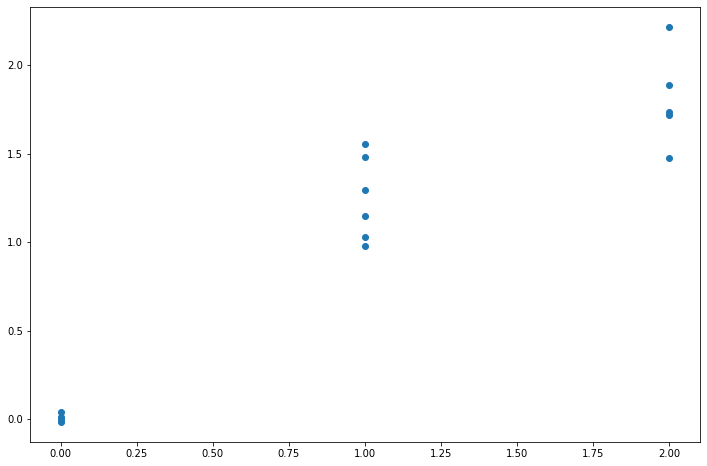

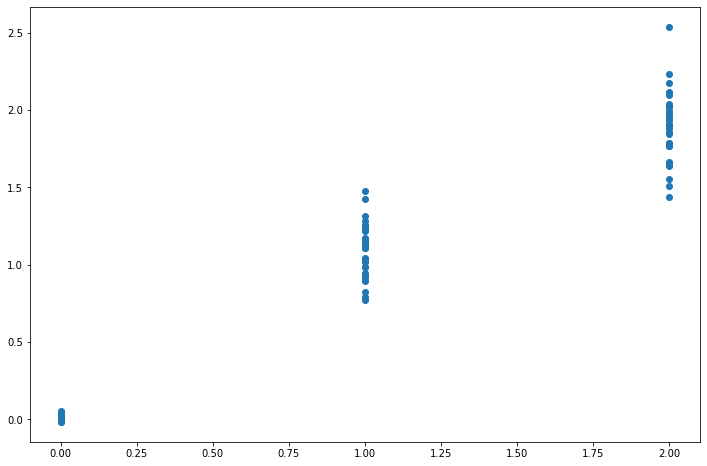

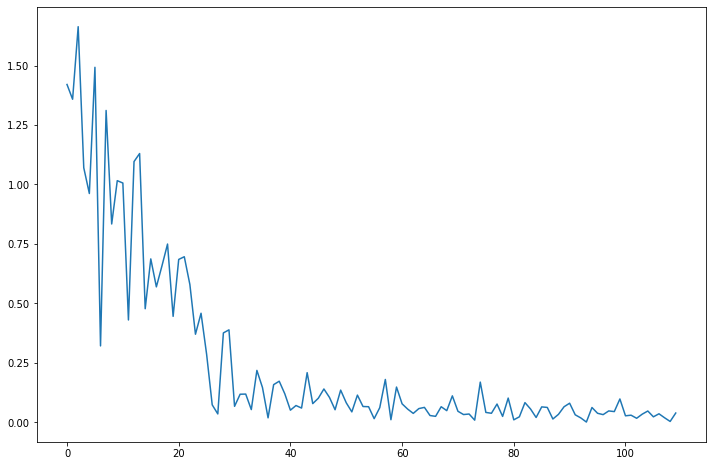

In [60]:
# Test set plot
plt.figure(figsize=(12, 8))

with torch.no_grad():
  predictions_test = mlp(torch.from_numpy(ssc.transform(X_test)).float())

with torch.no_grad():
  predictions_train = mlp(torch.from_numpy(ssc.transform(X_train)).float())

plt.scatter(y_test, predictions_test)
#plt.plot(np.arange(0,6))
plt.show()

plt.figure(figsize=(12, 8))
#plt.plot(np.arange(0,6))
plt.scatter(y_train, predictions_train)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(current_loss)
#print(loss_function(predictions_test,torch.from_numpy(y_test)))
plt.show()